# 1 引言

线性回归算法应该是大多数人机器学习之路上的第一站，因为线性回归算法原理简单清晰，但却囊括了拟合、优化等等经典的机器学习思想。去年毕业时参加求职面试就被要求介绍线性回归算法，但由于当初过于追求神经网络、SVN、无监督学习等更加高大尚的算法，反而忽略了线性回归这些基础算法，当时给出的答案实在是差强人意。

这一篇关于线性回归的总结我也犹豫过要不要写，如果你看了我上两篇关于最小二乘和梯度下降算法介绍的博客，你就会发现，关于最小二乘法和梯度下降算法的介绍都是以线性回归为例展开，所以，综合来说，之前两篇博客对一元线性回归还是多元线性回归算法都已经有了还算全面的总结，再写一篇关于线性回归的文章总感觉有些多余。不过，为了让我对机器学习的总结更加系统，还是决定专门总结一下。

# 2 什么是线性回归

说到线性回归，我们得先说说回归与分类、线性与非线性这些概念的区别。

回归和分类都是有监督学习（机器学习分有监督学习和无监督学习）中的概念。从算法的目标或者作用上看，分类的目标就如同字面上的意思，就是分类，将数据分门别类，而且类别是有限的（数学上称为离散的）。但回归算法不同，回归算法的目标是预测，说详细些就是从已有数据和结果中获取规律，对其它数据的位置结果进行预测，预测结果的数量数无限的（数学上叫连续的）。举个例子我们可以根据楼房的建材、面积、用途将茅草房、普通住房、厂房等等有限的几类，这就是分类；另外，我们可以根据房屋面积、地段、装修等因素对楼房房价进行预测，预测结果有无限种可能，可能是10000元/平米，也能是10001.1元/平米——这就是回归的过程。

对于线性和非线性的解释，我至今还没有见到过一个让我觉得满意的数学定义，所以，我也从直观认识上说说我的看法。我们高中时学习函数就是从一元一次函数学起的，一元一次函数在数学上可以表示为：

$$f(x)={{\theta }_{0}}+{{\theta }_{1}}x$$

在二维坐标轴上，其表现为一条直线。如果是三维空间中的二元一次函数，数学上表示为：

$$f(x)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}$$

其在空间上图形为一平面。以此类推，在更高维（$n$维)的平面上，多元一次函数表达式为：

$$f(x)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+\ldots +{{\theta }_{n}}{{x}_{n}}$$

在多维空间上，其图形我们称为为超平面。

如果一个数据模型能够用上述二维直线、三维平面或者更多维空间上的超平面去拟合，我们就可以说这个模型是线性模型。

最后，综合上面内容总结一下什么是西安线性回归：

**线性回归（Linear Regression）是一种通过属性的线性组合来进行预测的回归模型，其目的是找到一条直线或者一个平面或者更高维的超平面，使得预测值与真实值之间的误差最小化。**

# 3 最优解

上面提到，线性回归的目的就是找到一个线性模型，使的预测值与真实值之间的误差最小，这就是一个优化的问题。为什么要优化呢？看看下图：

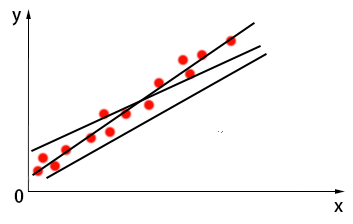

正如你眼前所见，图中的点代表数据，能够对这些数据点进行大概拟合的直线不止一条，到底哪一条才是最好呢？以上图中数据为例，假设此时模型为${y}'=f(x)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}$，图像如下所示，我们要对其拟合程度进行评价：

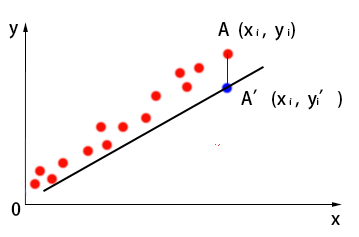

点$A({{x}_{i}},{{y}_{i}})$为数据集中某一点，使用模型预测时，结果为${A}'({{x}_{i}},{{{{y}'}}_{i}})$。我们用高中时学过，对于${A}$与${A}'$之间的误差，我们可以用它们之间的欧氏距离的平方来表示：

$$E(A,{A}')={{({{x}_{i}}-{{x}_{i}})}^{2}}+{{({{y}_{i}}-{{y}_{i}})}^{2}}={{({{\theta }_{0}}+{{\theta }_{1}}{{x}_{i}}-{{y}_{i}})}^{2}}$$

这是对一个点的拟合程度评价，但数据集中可不止$A({{x}_{i}},{{y}_{i}})$一个数据点，所以，我们需要对每个点进行误差评估，然后求和，也就是误差平方和作为这个线性模型对数据集的总体拟合程度评估：

$$J({{\theta }_{0}},{{\theta }_{1}})=\sum\limits_{i=1}^{m}{{{({{\theta }_{0}}+{{\theta }_{1}}{{x}_{i}}-{{y}_{i}})}^{2}}}$$

我们将$J({{\theta }_{0}},{{\theta }_{1}})$成为损失函数，也有资料中称为目标函数。这里，${{\theta }_{0}},{{\theta }_{1}}$是模型中$x$的参数。在不同的模型中，${{\theta }_{0}},{{\theta }_{1}}$取不同值，我们要做的就是求目标函数$J({{\theta }_{0}},{{\theta }_{1}})$取最小值时的${{\theta }_{0}},{{\theta }_{1}}$确切值，换句话说就是求$J({{\theta }_{0}},{{\theta }_{1}})$的最优解问题。

关于求最优解问题，最常用的算法就是最小二乘法和梯度下降法，这两种方法在前两篇博文中都有详细介绍，如果你尚不清楚其中原理和过程，还是去看看吧，这很重要，也很基础。

上面说的是一元线性回归模型，对于多元线性回归模型，原理也是一样的，只不过需要求解的参数不止${{\theta }_{0}},{{\theta }_{1}}$两个了就是，这里不再多说。下面我们用代码实现一元线性回归模型。

# 4 代码实现

# 4.1 pytorch实现

在实现模型之前，首先我们要制造一个数据集，在[0, 10]区间范围内，随机生成100个数：

In [1]:
import torch
from torch.autograd import Variable
from torch import nn
import matplotlib.pyplot as plt
x = torch.unsqueeze(torch.linspace(0, 10, 100), dim=1)
print(x[:10])

tensor([[0.0000],
        [0.1010],
        [0.2020],
        [0.3030],
        [0.4040],
        [0.5051],
        [0.6061],
        [0.7071],
        [0.8081],
        [0.9091]])


输出的内容有100行，这就是一个列向量，我们以则100个数作为数据集中的自变量，也就是X，假设我们需要拟合的模型为：$y=f(x)=0.5x+15$，为了更加符合真实数据集中随机误差的效果，我们在生成y的时候，加上一些服从高斯分布随机误差：

In [2]:
y = 0.5 * x + 15 + torch.rand(x.size())
print(y[:10])

tensor([[15.8144],
        [15.7983],
        [15.1210],
        [15.3061],
        [15.4152],
        [15.5577],
        [15.3078],
        [15.8151],
        [15.9422],
        [15.4746]])


在二维坐标轴上，这些点如下所示：

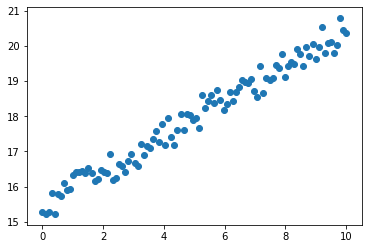

In [3]:
x = torch.unsqueeze(torch.linspace(0, 10, 100), dim=1)
y = 0.5 * x + 15 + torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

数据有了，我们可以开始搭建我们的模型了：

Epoch[100/1000], loss:19.743334
Epoch[200/1000], loss:7.338920
Epoch[300/1000], loss:2.753949
Epoch[400/1000], loss:1.059233
Epoch[500/1000], loss:0.432826
Epoch[600/1000], loss:0.201291
Epoch[700/1000], loss:0.115709
Epoch[800/1000], loss:0.084075
Epoch[900/1000], loss:0.072383
Epoch[1000/1000], loss:0.068061


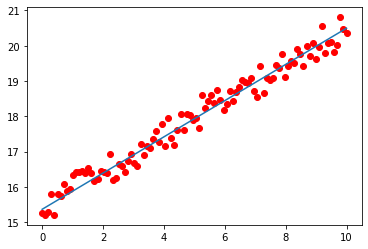

tensor([[0.5128]])	tensor([15.3651])


In [4]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 因为是一元线性回归，所以输入和输出的维度都是1
    def forward(self, x):
        out = self.linear(x)
        return out


if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

criterion = nn.MSELoss()  # 这里选择使用误差平方和作为损失函数，就是上文中说的函数J
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)  # 定义梯度下降算法进行优化


num_epochs = 1000  # 定义迭代次数
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)
    # 向前传播
    out = model(inputs)
    loss = criterion(out, target)
    # 向后传播
    optimizer.zero_grad()  # 注意每次迭代都需要清零
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print('Epoch[{}/{}], loss:{:.6f}'.format(epoch + 1, num_epochs, loss.item()))
model.eval()
if torch.cuda.is_available():
    predict = model(Variable(x).cuda())
    predict = predict.data.cpu().numpy()
else:
    predict = model(Variable(x))
    predict = predict.data.numpy()
plt.plot(x.numpy(), y.numpy(), 'ro', label='Original Data')
plt.plot(x.numpy(), predict, label='Fitting Line')
plt.show()
print(str(model.state_dict()['linear.weight']) + "\t" + str(model.state_dict()['linear.bias']))

# 4.2 TensorFlow2.0实现

In [1]:
import tensorflow as tf

In [39]:
x = tf.linspace(0.,10.,100)
x

<tf.Tensor: id=205629, shape=(100,), dtype=float32, numpy=
array([ 0.       ,  0.1010101,  0.2020202,  0.3030303,  0.4040404,
        0.5050505,  0.6060606,  0.7070707,  0.8080808,  0.9090909,
        1.010101 ,  1.111111 ,  1.2121212,  1.3131313,  1.4141414,
        1.5151515,  1.6161616,  1.7171717,  1.8181818,  1.9191918,
        2.020202 ,  2.121212 ,  2.222222 ,  2.3232322,  2.4242425,
        2.5252526,  2.6262627,  2.7272727,  2.8282828,  2.929293 ,
        3.030303 ,  3.131313 ,  3.2323232,  3.3333333,  3.4343433,
        3.5353534,  3.6363635,  3.7373736,  3.8383837,  3.9393938,
        4.040404 ,  4.141414 ,  4.242424 ,  4.3434343,  4.444444 ,
        4.5454545,  4.6464643,  4.7474747,  4.848485 ,  4.949495 ,
        5.050505 ,  5.151515 ,  5.2525253,  5.353535 ,  5.4545455,
        5.5555553,  5.6565657,  5.7575755,  5.858586 ,  5.9595957,
        6.060606 ,  6.161616 ,  6.262626 ,  6.363636 ,  6.4646463,
        6.5656567,  6.6666665,  6.767677 ,  6.8686867,  6.969697 ,
   

In [41]:
y = 0.5 * x + 15 + tf.random.truncated_normal((100,), mean=1, stddev=0.5)
print(y[:10])

tf.Tensor(
[16.014685  15.187728  16.314163  16.360064  16.853842  17.226461
 15.9778385 16.685257  16.884115  16.397228 ], shape=(10,), dtype=float32)


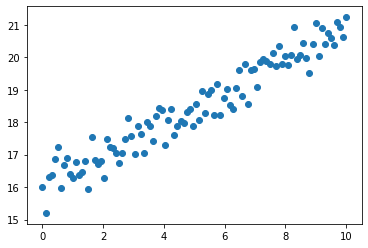

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [43]:
import numpy as np
# 模型中的两个参数


In [48]:
import numpy as np
 

w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

learning_rate = 0.01  # 学习率
# 所有样本训练的次数
epoch_number = 1000  # 迭代次数
optimizer = tf.optimizers.SGD(learning_rate)  #优化器
# 开始训练
for epoch in range(epoch_number):
    with tf.GradientTape() as g:
        pred = w*x + b
        loss = tf.losses.MSE(pred, y)  # 计算均方差损失
    # 计算梯度
    gradients = g.gradient(loss, [w, b])
    # 更新参数
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if epoch % 100 == 0:
        print('epoch :',epoch, '   loss:', loss, '   w:', w.numpy(), '   b:', b.numpy())
# 对所有样本迭代完1000次后 输出最后的w,b
print('last weight w={0} and b={1}'.format(w.numpy(),b.numpy()))

epoch : 0    loss: tf.Tensor(292.91647, shape=(), dtype=float32)    w: 1.7383862    b: 2.0522277
epoch : 100    loss: tf.Tensor(18.258339, shape=(), dtype=float32)    w: 1.7545552    b: 7.595278
epoch : 200    loss: tf.Tensor(6.849392, shape=(), dtype=float32)    w: 1.2592618    b: 10.889324
epoch : 300    loss: tf.Tensor(2.6323707, shape=(), dtype=float32)    w: 0.95813954    b: 12.891996
epoch : 400    loss: tf.Tensor(1.0736642, shape=(), dtype=float32)    w: 0.7750678    b: 14.109551
epoch : 500    loss: tf.Tensor(0.4975283, shape=(), dtype=float32)    w: 0.66376615    b: 14.849785
epoch : 600    loss: tf.Tensor(0.28457418, shape=(), dtype=float32)    w: 0.5960984    b: 15.299823
epoch : 700    loss: tf.Tensor(0.20585985, shape=(), dtype=float32)    w: 0.5549578    b: 15.573437
epoch : 800    loss: tf.Tensor(0.17676613, shape=(), dtype=float32)    w: 0.5299465    b: 15.7397785
epoch : 900    loss: tf.Tensor(0.16601223, shape=(), dtype=float32)    w: 0.5147401    b: 15.840912
last we

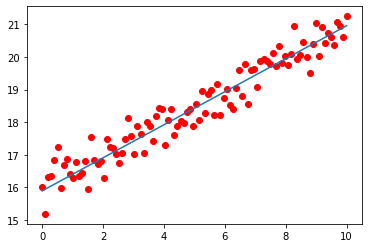

In [47]:
plt.plot(x.numpy(), y.numpy(), 'ro')
plt.plot(x.numpy(), w.numpy()*x+b.numpy())
plt.show()